In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# interactive mode
plt.ion()

d:\programs\anaconda3\envs\tensorflow1\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
d:\programs\anaconda3\envs\tensorflow1\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Dataset comes with a csv file with annotations 

In [5]:
landmarks_frame = pd.read_csv("data/faces/face_landmarks.csv")

# Number of landmarks
n = 65
#Get the first column with all values (Name Col)
img_name = landmarks_frame.iloc[n, 0]

#Get The second column to Col 65 with all values (part_1_x -> part_65_x)
landmarks = landmarks_frame.iloc[n, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image Name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))


Image Name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


# Helper func to show an image and its landmarks and use it to show a samle

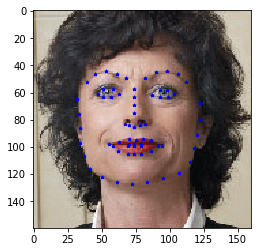

In [9]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1],
               s = 10, marker='*', c='b')
    plt.pause(0.001)  # pause a bit so that plots are updated
plt.figure()
show_landmarks(io.imread(os.path.join('data/faces/', img_name)), landmarks)
plt.show()